# Q-Learning: An Overview
Q-Learning is a model-free reinforcement learning algorithm that enables an agent to learn how to optimally act in a given environment by learning the value of actions in states. It does not require a model of the environment (hence "model-free") and can learn to make optimal decisions purely from rewards received through interactions with the environment.

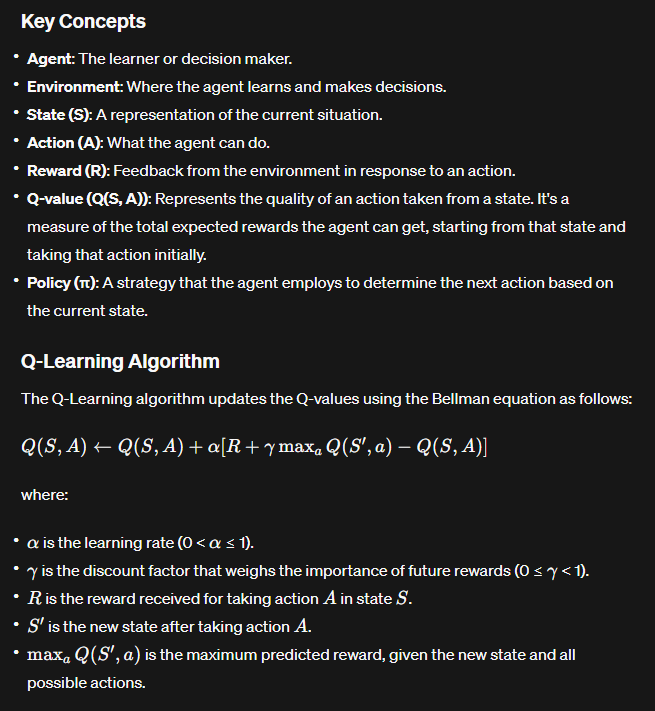

# Implementing Q-Learning: A Simple Example
Let's implement Q-Learning where an agent learns to navigate a simple grid environment to reach a goal.

In [1]:
import numpy as np

# Environment settings
n_states = 6  # For simplicity, assume 6 states
n_actions = 2  # Assume 2 possible actions
gamma = 0.95  # Discount factor
alpha = 0.1  # Learning rate
episodes = 10000  # Number of episodes to train

# Initialize Q-table with zeros
Q = np.zeros((n_states, n_actions))

# Dummy reward table for the sake of example
# Rows are states, columns are actions
R = np.array([
    [-1, 0],  # Rewards for actions in state 0
    [-1, 100],  # Rewards for actions in state 1, and so on
    [-1, -1],
    [-1, -1],
    [-1, 100],
    [-1, -1]
])

# Learning process
for episode in range(episodes):
    state = np.random.randint(0, n_states)  # Start from a random state
    while True:
        # Select an action (for simplicity, randomly)
        action = np.random.randint(0, n_actions)

        # Take action, observe new state and reward
        new_state = action  # Simplified for example; normally, the environment would determine the new state
        reward = R[state, action]

        # Update Q-value
        Q[state, action] += alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Transition to new state
        state = new_state

        # Break if at goal state (simplified condition)
        if state == 1 or state == 4:
            break

print("Q-table:")
print(Q)


Q-table:
[[1777.63965269 1872.53865094]
 [1776.38951516 1971.34638724]
 [1776.70152878 1870.36149795]
 [1777.02006822 1870.28754648]
 [1776.13890349 1971.46267106]
 [1776.35668837 1870.63100083]]


# A Simple Reinforcement Learning Model: The Multi-Armed Bandit
One of the simplest problems to illustrate the basics of RL is the multi-armed bandit problem. Imagine a slot machine with multiple levers, where each lever provides a different, randomized reward. The goal is to discover which lever provides the best average reward, optimizing the rewards over time.

The Multi-Armed Bandit problem is a classic example used in reinforcement learning to demonstrate the exploration-exploitation trade-off. The name is derived from a gambler facing a row of slot machines (also known as "one-armed bandits"), each with a different, fixed payout rate. The gambler seeks to maximize their winnings by deciding which machines to play, how many times to play them, and in what order. This scenario encapsulates a fundamental dilemma in decision-making: whether to exploit known resources with known returns or to explore new resources to discover potentially higher returns.

**Key Elements of the Multi-Armed Bandit Problem**
* Arms: Each slot machine or decision option available to the agent. Pulling an arm results in receiving a reward.
* Reward: A numerical payoff received from pulling an arm. The reward distributions for the arms are initially unknown to the agent.
* Objective: To maximize the cumulative reward over a series of pulls.

**Exploration vs. Exploitation**
* Exploration: Trying out different arms to gather more information about their reward distributions. Exploration can lead to discovering arms that yield higher rewards.
* Exploitation: Leveraging known information to pull the arm that currently seems to offer the best expected reward. Exploitation maximizes immediate returns based on the information acquired so far.

**Strategies for the Multi-Armed Bandit Problem**
* Greedy Strategy: Always pull the arm with the highest estimated reward. This approach maximizes immediate rewards but risks missing out on truly optimal arms if not all have been explored sufficiently.
* Epsilon-Greedy Strategy: With probability ϵ, explore by pulling a random arm; otherwise, exploit by pulling the current best arm. This strategy introduces a balance between exploration and exploitation.
* Upper Confidence Bound (UCB): Selects arms based on a balance of their estimated rewards and the uncertainty or variance in those estimates. Arms that have been pulled less frequently or have higher variance are more likely to be explored.
* Thompson Sampling: A Bayesian approach that considers the probability distribution of each arm's rewards and selects an arm based on sampled estimates from these distributions. This method dynamically adjusts the exploration-exploitation balance based on observed outcomes.

**Applications**
The Multi-Armed Bandit framework is widely applicable beyond gambling scenarios, including:

* A/B Testing and Adaptive Design: Optimizing web design, marketing strategies, or medical treatment plans by dynamically allocating resources to the most promising options.
* Resource Allocation: Allocating limited resources across a range of competing projects or investments to maximize returns.
* Dynamic Pricing: Adjusting prices in real-time based on customer interactions to maximize revenue.

**Challenges and Extensions**
* Contextual Bandits: An extension of the problem where the decision to pull an arm can depend on contextual information or the state of the environment, making it closer to real-world decision-making scenarios.
* Scaling: As the number of arms increases, maintaining an effective balance between exploration and exploitation becomes more challenging.

In [2]:
import numpy as np

class MultiArmedBandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.arm_values = np.random.normal(0, 1, n_arms)  # True values of the arms
        self.K = np.zeros(n_arms)  # Counts the number of times each arm was pulled
        self.est_values = np.zeros(n_arms)  # Estimated values of arms

    def get_reward(self, action):
        noise = np.random.normal(0, 1)  # Adding randomness to the reward
        return self.arm_values[action] + noise

    def choose_action(self, strategy="epsilon-greedy", epsilon=0.1):
        if strategy == "epsilon-greedy" and np.random.random() < epsilon:
            return np.random.randint(self.n_arms)  # Explore
        else:
            return np.argmax(self.est_values)  # Exploit

    def update_estimated_values(self, action, reward):
        self.K[action] += 1
        alpha = 1 / self.K[action]  # Learning rate
        self.est_values[action] += alpha * (reward - self.est_values[action])  # Update rule

# Example usage
n_arms = 5
bandit = MultiArmedBandit(n_arms)
n_steps = 1000

for step in range(n_steps):
    action = bandit.choose_action()
    reward = bandit.get_reward(action)
    bandit.update_estimated_values(action, reward)

print("True values:", bandit.arm_values)
print("Estimated values:", bandit.est_values)


True values: [ 1.33212836 -0.86657362  0.66924036  1.09137079 -0.96839908]
Estimated values: [ 1.31014917 -0.91589623  0.76641052  1.19515656 -0.91878083]


In [3]:
import numpy as np

class AdvertisingBandit:
    def __init__(self, n_channels, epsilon=0.1):
        self.n_channels = n_channels
        self.epsilon = epsilon
        self.channel_rewards = np.zeros(n_channels)  # Total reward per channel
        self.channel_selections = np.zeros(n_channels)  # Number of times each channel was selected

    def simulate_channel_response(self, channel):
        # Simulate channel response rates (rewards)
        # For simplicity, these are hardcoded, but could be dynamically generated or based on historical data
        true_response_rates = [0.1, 0.15, 0.05, 0.2, 0.12]  # Example response rates for each channel
        response = np.random.binomial(n=1, p=true_response_rates[channel])  # Simulate a response (1 or 0)
        return response

    def select_channel(self):
        if np.random.rand() < self.epsilon:
            # Exploration: randomly select a channel
            return np.random.randint(self.n_channels)
        else:
            # Exploitation: select the channel with the highest average reward
            average_rewards = self.channel_rewards / (self.channel_selections + 1)  # Avoid division by zero
            return np.argmax(average_rewards)

    def update_channel_rewards(self, channel, reward):
        self.channel_rewards[channel] += reward
        self.channel_selections[channel] += 1

    def allocate_budget(self, budget):
        while budget > 0:
            channel = self.select_channel()
            reward = self.simulate_channel_response(channel)
            self.update_channel_rewards(channel, reward)
            budget -= 1  # Assuming each allocation costs 1 unit of budget

        # Report
        print("Total Rewards per Channel:", self.channel_rewards)
        print("Channel Selections:", self.channel_selections)
        best_channel = np.argmax(self.channel_rewards / (self.channel_selections + 1))
        print(f"Best Channel to Allocate More Budget: {best_channel}")

# Parameters
n_channels = 5
budget = 1000  # Total budget for allocation
epsilon = 0.1  # Exploration rate

# Initialize and run the simulation
bandit = AdvertisingBandit(n_channels, epsilon)
bandit.allocate_budget(budget)


Total Rewards per Channel: [ 13.   0.   1. 172.   8.]
Channel Selections: [ 98.  18.  22. 823.  39.]
Best Channel to Allocate More Budget: 3
